In [1]:
from sklearn import tree
import pandas as pd
import graphviz

In [3]:
patient_data = pd.read_csv('heart.xls')

In [5]:
patient_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [45]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [19]:
X, y = patient_data.drop('target', axis='columns'), patient_data[['target']]

In [39]:
X_labels = X.columns

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=69)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820, 1), (205, 1))

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
mima_scaler = MinMaxScaler()

In [63]:
mima_scaled_X_train = mima_scaler.fit_transform(X_train)

In [65]:
mima_scaled_X_train = pd.DataFrame(mima_scaled_X_train, columns=X_labels)

In [67]:
mima_scaled_X_test = mima_scaler.fit_transform(X_test)

In [69]:
mima_scaled_X_test = pd.DataFrame(mima_scaled_X_test, columns=X_labels)

In [23]:
clf = tree.DecisionTreeClassifier()

In [73]:
base_tree = clf.fit(mima_scaled_X_train, y_train)

[Text(0.4646849593495935, 0.95, 'x[2] <= 0.167\ngini = 0.5\nsamples = 820\nvalue = [400, 420]'),
 Text(0.21544715447154472, 0.85, 'x[11] <= 0.125\ngini = 0.371\nsamples = 394\nvalue = [297, 97]'),
 Text(0.13008130081300814, 0.75, 'x[12] <= 0.833\ngini = 0.5\nsamples = 174\nvalue = [88.0, 86.0]'),
 Text(0.06504065040650407, 0.65, 'x[7] <= 0.37\ngini = 0.367\nsamples = 95\nvalue = [23, 72]'),
 Text(0.04878048780487805, 0.55, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.08130081300813008, 0.55, 'x[8] <= 0.5\ngini = 0.285\nsamples = 87\nvalue = [15.0, 72.0]'),
 Text(0.032520325203252036, 0.45, 'x[4] <= 0.435\ngini = 0.036\nsamples = 55\nvalue = [1, 54]'),
 Text(0.016260162601626018, 0.35, 'gini = 0.0\nsamples = 51\nvalue = [0, 51]'),
 Text(0.04878048780487805, 0.35, 'x[3] <= 0.387\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.032520325203252036, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06504065040650407, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Tex

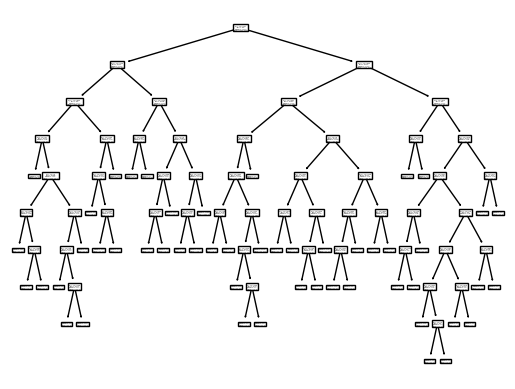

In [75]:
tree.plot_tree(base_tree)

In [83]:
train_pred = base_tree.predict(mima_scaled_X_train)

In [85]:
test_pred = base_tree.predict(mima_scaled_X_test)

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [99]:
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_roc_auc = roc_auc_score(y_train, train_pred)

In [103]:
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_roc_auc = roc_auc_score(y_test, test_pred)

In [107]:
print(f'For all metrics on training data:\nAccuracy = {train_accuracy}.\nPrecision = {train_precision}.\nRecall = {train_recall}.\nF1 Score = {train_f1}.\nROC-AUC = {train_roc_auc}.')

For all metrics on training data:
Accuracy = 1.0.
Precision = 1.0.
Recall = 1.0.
F1 Score = 1.0.
ROC-AUC = 1.0.


In [109]:
print(f'For all metrics on testing data:\nAccuracy = {test_accuracy}.\nPrecision = {test_precision}.\nRecall = {test_recall}.\nF1 Score = {test_f1}.\nROC-AUC = {test_roc_auc}.')

For all metrics on testing data:
Accuracy = 0.8731707317073171.
Precision = 0.9081632653061225.
Recall = 0.839622641509434.
F1 Score = 0.8725490196078431.
ROC-AUC = 0.8743567753001715.


In [111]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X_labels, class_names=['No Disease', 'Disease'], filled=True, rounded=True, special_characters=True)

In [113]:
tree_graph = graphviz.Source(dot_data)

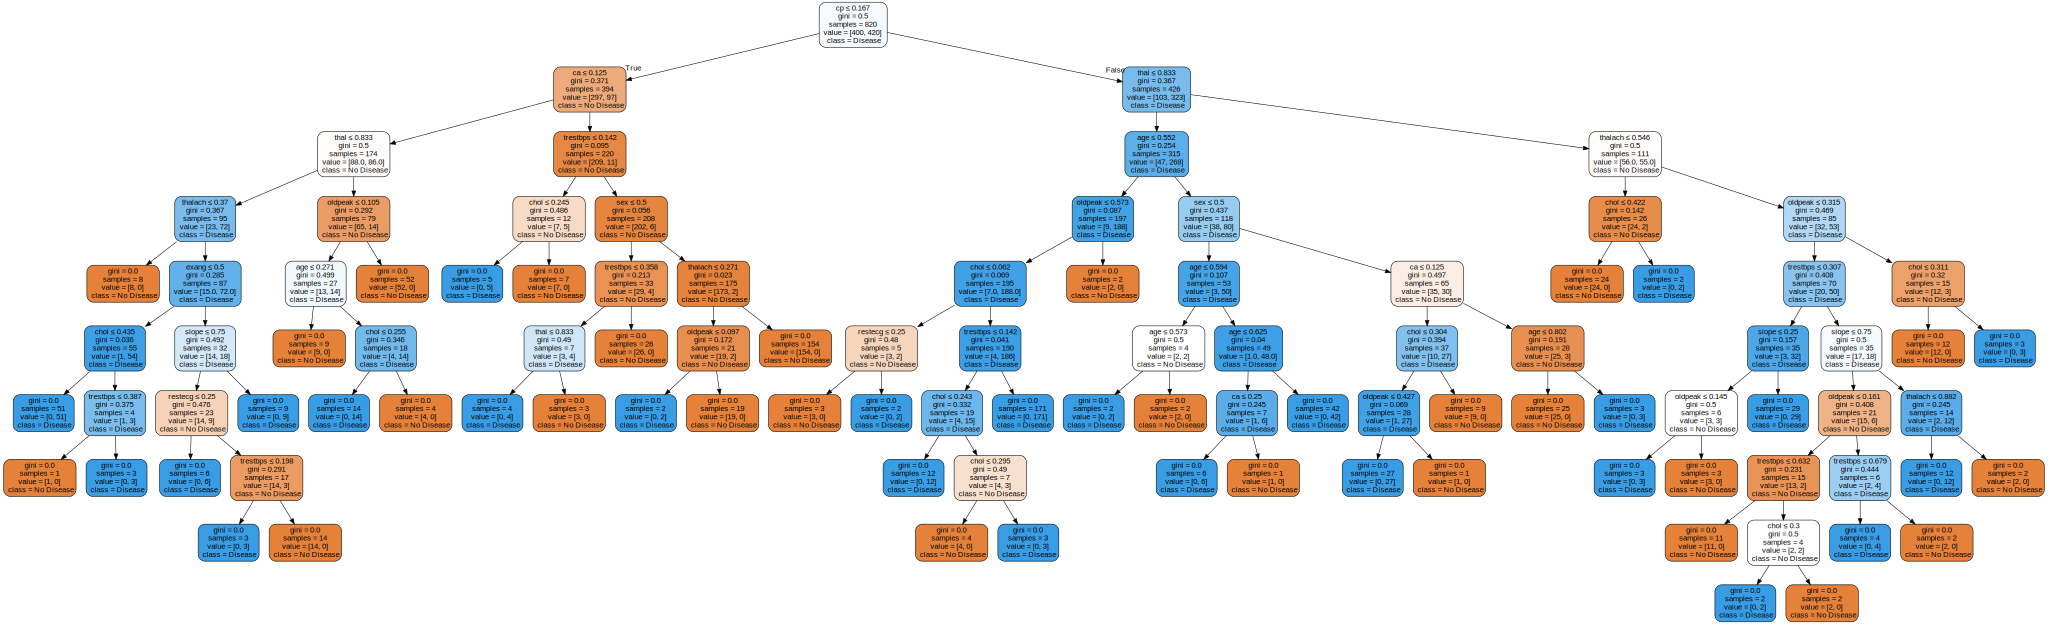

In [115]:
tree_graph

In [117]:
tree_graph.render('Heart-Disease')

'Heart-Disease.pdf'